#### Import libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df_house = pd.read_csv(os.getcwd() + '/kc_house_data.csv')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df = df_house.sample(n = 5000) 

#### Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [3]:
df.shape

(5000, 21)

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.039247,0.004410,0.002709,-0.017391,-0.141844,0.022568,-0.021631,0.009647,-0.011641,-0.002118,-0.012793,-0.012127,0.029178,-0.039847,-0.015580,-0.028310,0.030244,-0.008562,-0.144049
price,-0.039247,1.000000,0.304099,0.513208,0.690498,0.107484,0.264732,0.212888,0.397023,0.055151,0.686641,0.589024,0.332396,0.044049,0.128211,-0.046952,0.321402,0.009021,0.590196,0.079898
bedrooms,0.004410,0.304099,1.000000,0.537486,0.587462,0.035883,0.184187,-0.043449,0.055546,0.024955,0.359977,0.489739,0.303743,0.173622,0.021818,-0.149127,-0.005015,0.134438,0.388241,0.028183
bathrooms,0.002709,0.513208,0.537486,1.000000,0.747767,0.106228,0.506134,0.034199,0.176815,-0.128060,0.657982,0.682245,0.278375,0.521972,0.043599,-0.214559,0.008674,0.234836,0.555801,0.082499
sqft_living,-0.017391,0.690498,0.587462,0.747767,1.000000,0.214883,0.349941,0.083934,0.283132,-0.048465,0.757385,0.873284,0.444164,0.322749,0.051374,-0.215012,0.036921,0.246179,0.740995,0.188081
sqft_lot,-0.141844,0.107484,0.035883,0.106228,0.214883,1.000000,0.003273,0.030501,0.094494,-0.020006,0.163323,0.227980,0.021288,0.076482,0.030583,-0.144492,-0.110699,0.254231,0.176918,0.764243
floors,0.022568,0.264732,0.184187,0.506134,0.349941,0.003273,1.000000,0.021294,0.048764,-0.259357,0.450156,0.524614,-0.247322,0.481350,0.010645,-0.061340,0.042479,0.131539,0.269807,-0.017953
waterfront,-0.021631,0.212888,-0.043449,0.034199,0.083934,0.030501,0.021294,1.000000,0.397952,0.027976,0.075859,0.062640,0.056880,-0.030714,0.078417,0.014918,-0.028962,-0.057918,0.070872,0.044759
view,0.009647,0.397023,0.055546,0.176815,0.283132,0.094494,0.048764,0.397952,1.000000,0.059232,0.271465,0.173369,0.261628,-0.058144,0.127574,0.071995,-0.006892,-0.100233,0.285314,0.089265
condition,-0.011641,0.055151,0.024955,-0.128060,-0.048465,-0.020006,-0.259357,0.027976,0.059232,1.000000,-0.137546,-0.150080,0.176629,-0.347903,-0.049795,-0.019012,0.003159,-0.087500,-0.073813,0.009082


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.588219e+09,5.364006e+05,3.353200,2.109800,2067.763600,15015.462600,1.491900,0.007000,0.233400,3.410000,7.642800,1774.28460,293.479000,1970.942200,82.982200,98078.700000,47.559741,-122.215951,1973.596200,12892.025800
std,2.892237e+09,3.433871e+05,0.903445,0.765138,902.670769,37878.162513,0.538927,0.083381,0.764618,0.656038,1.154415,809.70193,440.312237,29.289815,398.353881,53.633013,0.137943,0.138505,668.636836,27125.839107
min,1.200021e+06,7.500000e+04,0.000000,0.000000,390.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,390.00000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.509000,399.000000,660.000000
25%,2.110808e+09,3.213750e+05,3.000000,1.750000,1430.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.00000,0.000000,1951.000000,0.000000,98033.000000,47.463975,-122.328000,1490.000000,5100.000000
50%,3.904920e+09,4.500000e+05,3.000000,2.250000,1900.000000,7620.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.00000,0.000000,1975.000000,0.000000,98065.000000,47.570000,-122.235000,1830.000000,7605.500000
75%,7.338927e+09,6.360250e+05,4.000000,2.500000,2520.000000,10492.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2190.00000,570.000000,1996.000000,0.000000,98118.000000,47.677900,-122.128000,2340.000000,10000.000000
max,9.839301e+09,3.400000e+06,8.000000,6.500000,8020.000000,881654.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.00000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.352000,5790.000000,560617.000000


In [8]:
# house id and date of creation is not required. instead of date of creation and yr built we can predict yr of renovation
# no of views is not required for selling of house
df = df.drop(['id', 'date', 'view', 'yr_built'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1511,390000.0,3,1.75,1320,7725,1.0,0,3,8,1320,0,0,98058,47.4425,-122.133,2020,7210
14959,220000.0,4,2.50,2160,8005,2.0,0,3,7,2160,0,0,98001,47.2668,-122.231,1790,8016
12035,415000.0,2,1.75,1550,4257,1.0,0,3,7,830,720,0,98136,47.5274,-122.384,1920,5100
17137,1776000.0,3,3.25,3230,7800,2.0,0,3,10,3230,0,0,98199,47.6348,-122.403,3030,6600
2555,646000.0,3,2.75,2460,6413,2.0,0,3,9,2460,0,0,98028,47.7497,-122.245,2440,6092


In [9]:
#dropping these two columns as there are alterantive features sqft_living15, sqft_lot15, which gives latest information
df = df.drop(['sqft_living','sqft_lot'], axis=1) 
df.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1511,390000.0,3,1.75,1.0,0,3,8,1320,0,0,98058,47.4425,-122.133,2020,7210
14959,220000.0,4,2.50,2.0,0,3,7,2160,0,0,98001,47.2668,-122.231,1790,8016
12035,415000.0,2,1.75,1.0,0,3,7,830,720,0,98136,47.5274,-122.384,1920,5100
17137,1776000.0,3,3.25,2.0,0,3,10,3230,0,0,98199,47.6348,-122.403,3030,6600
2555,646000.0,3,2.75,2.0,0,3,9,2460,0,0,98028,47.7497,-122.245,2440,6092


In [10]:
df = df.drop(['zipcode'], axis=1) # long and lat will handle the location
df.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
1511,390000.0,3,1.75,1.0,0,3,8,1320,0,0,47.4425,-122.133,2020,7210
14959,220000.0,4,2.50,2.0,0,3,7,2160,0,0,47.2668,-122.231,1790,8016
12035,415000.0,2,1.75,1.0,0,3,7,830,720,0,47.5274,-122.384,1920,5100
17137,1776000.0,3,3.25,2.0,0,3,10,3230,0,0,47.6348,-122.403,3030,6600
2555,646000.0,3,2.75,2.0,0,3,9,2460,0,0,47.7497,-122.245,2440,6092


In [11]:
df.corr()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.304099,0.513208,0.264732,0.212888,0.055151,0.686641,0.589024,0.332396,0.128211,0.321402,0.009021,0.590196,0.079898
bedrooms,0.304099,1.000000,0.537486,0.184187,-0.043449,0.024955,0.359977,0.489739,0.303743,0.021818,-0.005015,0.134438,0.388241,0.028183
bathrooms,0.513208,0.537486,1.000000,0.506134,0.034199,-0.128060,0.657982,0.682245,0.278375,0.043599,0.008674,0.234836,0.555801,0.082499
floors,0.264732,0.184187,0.506134,1.000000,0.021294,-0.259357,0.450156,0.524614,-0.247322,0.010645,0.042479,0.131539,0.269807,-0.017953
waterfront,0.212888,-0.043449,0.034199,0.021294,1.000000,0.027976,0.075859,0.062640,0.056880,0.078417,-0.028962,-0.057918,0.070872,0.044759
condition,0.055151,0.024955,-0.128060,-0.259357,0.027976,1.000000,-0.137546,-0.150080,0.176629,-0.049795,0.003159,-0.087500,-0.073813,0.009082
grade,0.686641,0.359977,0.657982,0.450156,0.075859,-0.137546,1.000000,0.741887,0.188417,0.019791,0.098498,0.194232,0.699390,0.137317
sqft_above,0.589024,0.489739,0.682245,0.524614,0.062640,-0.150080,0.741887,1.000000,-0.048633,0.034660,-0.021560,0.351761,0.713605,0.205823
sqft_basement,0.332396,0.303743,0.278375,-0.247322,0.056880,0.176629,0.188417,-0.048633,1.000000,0.041584,0.115338,-0.142177,0.206824,0.007087
yr_renovated,0.128211,0.021818,0.043599,0.010645,0.078417,-0.049795,0.019791,0.034660,0.041584,1.000000,0.032335,-0.070306,0.007497,0.027255


In [12]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

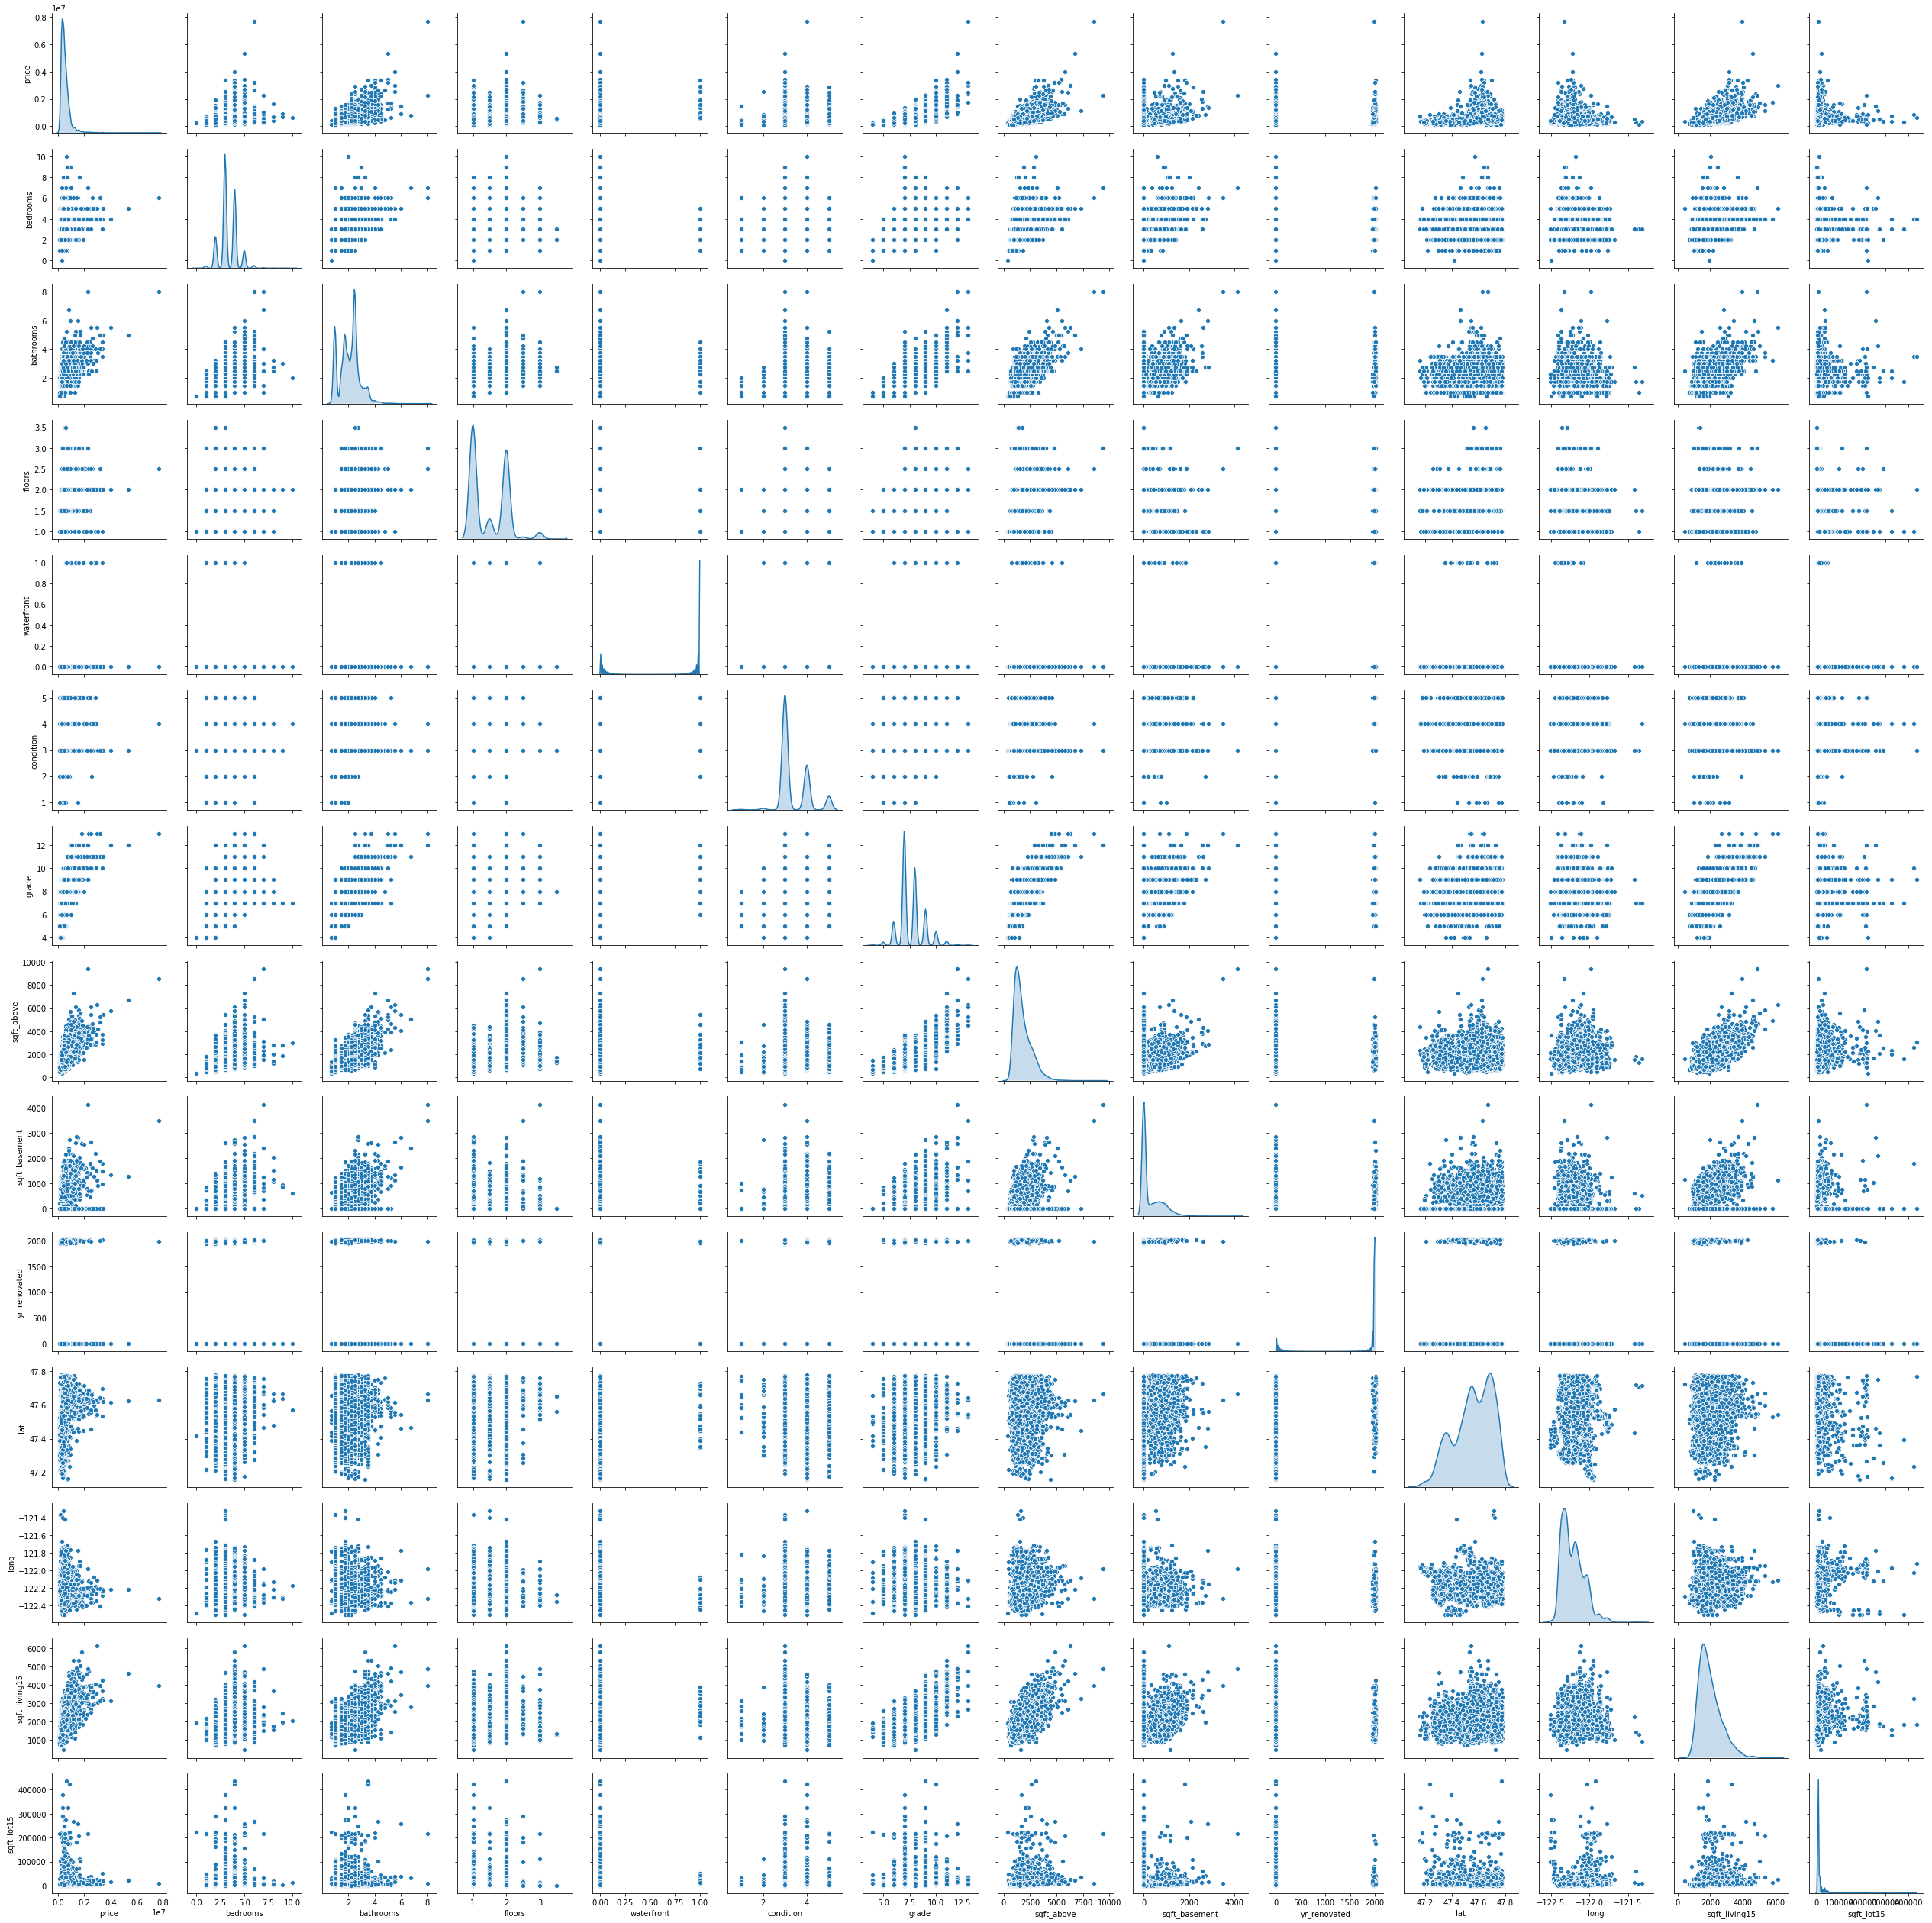

In [22]:
import seaborn as sns
sns.pairplot(df, diag_kind = "kde")

#### State your insights.

In [13]:
print("Mean is very high than median for id,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_basement,yr_renovated and thus they form a right skewed. Standard deviation seems to be in the same range hence data is moderately spread")

Mean is very high than median for id,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_basement,yr_renovated and thus they form a right skewed. Standard deviation seems to be in the same range hence data is moderately spread


#### Build a linear regression model to predict the house prices

In [14]:
#splitting dataset into training and test data
from sklearn.model_selection import train_test_split


array = df.values
X = array[:,1:]
y = array[:,0]
# X = df.drop(['price'], axis=1)
# y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# X_train
# y_train

In [15]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
LR_score = LR_model.score(X_train, y_train)
print('Score=', LR_score)
LR_pred = LR_model.predict(X_test)
LR_pred

Score= 0.686124767515419


array([499532.58234069, 732716.1930204 , 621978.52385004, ...,
       499482.45128658, 636101.15490401, 787586.52361933])

#### Try to find out important features or create new features to improve the performance for your model.

In [16]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import pandas as pd

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [17]:
cov_matrix = np.cov(X_train_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) 

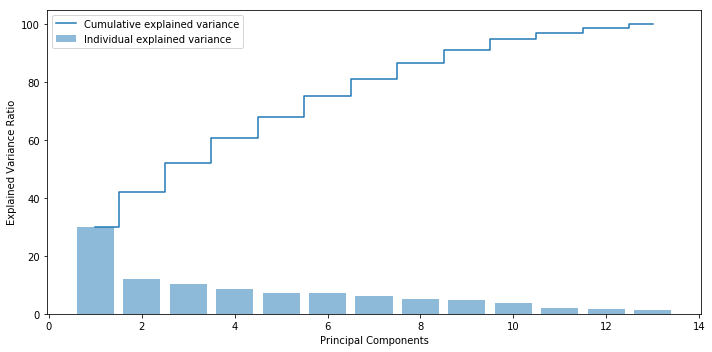

In [18]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [19]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
#eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:10]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)  

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Proj_train_data, y_train)
#predicted_values = model.predict(Proj_test_data)

result = model.score(Proj_test_data, y_test)
print(result)

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.008


In [44]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# dt_model = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 5 )
# lrcl = LogisticRegression(random_state=1)
# rfcl = RandomForestClassifier(random_state=1)
# nbcl = GaussianNB()
# bgcl = BaggingClassifier( n_estimators=10)  #the base_estimator can be null. The bagging classifer  will build it's own tree

# #enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl), ('dt', dt_model)], voting = 'hard')

# stack = VotingClassifier(estimators = [('lor', lrcl), ('nb', nbcl), ('dt', dt_model), ('rfc', rfcl), ('bgc',bgcl)], voting = 'hard')

In [45]:
# for clf, label in zip([lrcl , rfcl, nbcl, stack, bgcl, dt_model], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Stacking', 'Bagging', 'Decision Tree']):
#     scores = cross_val_score(clf, X_train1, y_train1, cv=5, scoring='accuracy')
#     print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
ct = ColumnTransformer([("scaling", StandardScaler(), ['bathrooms' , 'sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']), ("OneHotCoding", OneHotEncoder(sparse=False),
                                                                                  ['bedrooms','condition','waterfront', 'grade', 'floors'])])
ct

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True), ['bathrooms', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']), ('OneHotCoding', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['bedrooms', 'condition', 'waterfront', 'grade', 'floors'])])

In [22]:
ct.fit(X_train)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [37]:
X_train_transformed = ct.transform(X_train)

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.453682,0.468899,-0.632574,-0.215255,-1.380501,0.180935,0.111243,0.591871,-0.132455,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.187500,1.008447,-0.632574,-0.215255,-1.342760,-0.006975,0.358128,0.959690,-0.057388,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.508091,0.088764,0.595391,-0.215255,-0.663419,-1.455746,0.929489,0.724286,0.914929,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.133091,0.321750,-0.632574,-0.215255,-0.474714,0.776222,0.449828,-0.246758,-0.137586,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.453682,-0.536621,0.707024,-0.215255,-1.418242,-1.691710,0.054812,-0.541013,-0.189682,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-0.133091,-0.033861,-0.632574,-0.215255,1.676532,-0.752877,-1.017372,-0.629290,-0.113116,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,-0.774273,-0.413997,-0.632574,-0.215255,2.091684,-0.836074,-0.488334,-0.791131,-0.105617,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.508091,1.020710,-0.632574,-0.215255,-0.229396,-0.155438,2.361420,0.636009,-0.307058,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-0.133091,-0.769608,-0.632574,4.677131,-0.833254,0.984931,0.019543,-0.467449,-0.138296,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.508091,1.866818,-0.632574,-0.215255,-0.040690,0.276324,1.641927,1.827744,-0.256501,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logreg.score(X_train_transformed, y_train)

0.10571428571428572

In [40]:
X_test_transformed = ct.transform(X_test)

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [41]:
logreg = LogisticRegression()
logreg.fit(X_test_transformed, y_test)

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
logreg.score(X_test_transformed, y_test)

0.22

#### Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# array = df.values
# X = array[:,1:]
# y = array[:,0]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
def svc_param_selection(X, y, nfolds):
    Cs = [1]
    gammas = [0.001]
    kval = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kval}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    score = clf.score(X_test,y_test)
    print(score)
    grid_search.best_params_
    return grid_search.best_params_


for i in range(2,5):
    best_param = svc_param_selection(X_train,y_train, i)
    print("with cv = ", i, " best param is = ", best_param)

/Users/prashant.a.gaurav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
